# **Práctica 5: ACP y ACD**

Nombre:

Número de cuenta:

Email:

**Objetivo.** Realizar una selección de características a través de Análisis de Componentes Principales (ACP) y Análisis Correlacional de Datos (ACD).

**Fuente de datos:**

* ID number: Identifica al paciente
* Diagnosis: Diagnostico (M=maligno, B=benigno)
* Radius: Media de las distancias del centro y puntos del perímetro
* Texture: Desviación estándar de la escala de grises
* Perimeter: Valor del perímetro del cáncer de mama
* Area: Valor del área del cáncer de mama
* Smoothness: Variación de la longitud del radio
* Compactness: Perímetro ^ 2 /Area - 1
* Concavity: Caída o gravedad de las curvas de nivel
* Concave points: Número de sectores de contorno cóncavo
* Symmetry: Simetría de la imagen
* Fractal dimension: “Aproximación de frontera” - 1

### **Importar las bibliotecas y los datos**

In [ ]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para la generación de gráficas a partir de los datos
import seaborn as sns                       # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [ ]:
BCancer = pd.read_csv("Datos/WDBCOriginal.csv")
BCancer

,IDNumber,Diagnosis,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,P-842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,P-842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,P-84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,P-84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,P-84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...,...,...
564,P-926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,P-926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,P-926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,P-927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


## **I. Análisis de componentes principales (ACP)**

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

#### **Paso 1:** Hay evidencia de variables posiblemente correlacionadas.

In [ ]:
CorrBCancer = BCancer.corr(method='pearson')
CorrBCancer

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


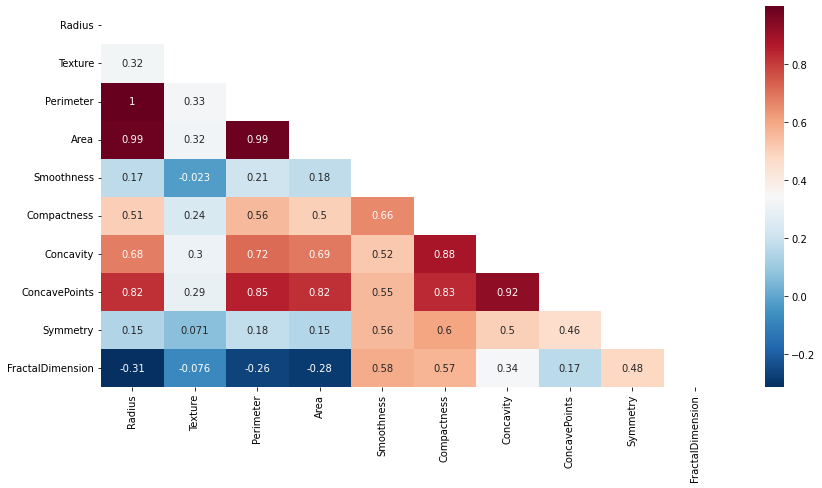

In [ ]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrBCancer)
sns.heatmap(CorrBCancer, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

#### **Paso 2:** Se hace una estandarización de los datos

---



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Estandarizar = StandardScaler()                                  # Se instancia el objeto StandardScaler o MinMaxScaler 
NuevaMatriz = BCancer.drop(columns=['IDNumber', 'Diagnosis'])    # Se quitan las variables nominales
MEstandarizada = Estandarizar.fit_transform(NuevaMatriz)         # Se calculan la media y desviación para cada variable, y se escalan los datos

In [ ]:
pd.DataFrame(MEstandarizada, columns=NuevaMatriz.columns)

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


#### **Pasos 3 y 4:** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores)

In [ ]:
pca = PCA(n_components=None)     # pca=PCA(n_components=None), pca=PCA(.85)
pca.fit(MEstandarizada)          # Se obtiene los componentes
print(pca.components_)

[[ 3.63937928e-01  1.54451129e-01  3.76044342e-01  3.64085847e-01
   2.32480530e-01  3.64442059e-01  3.95748488e-01  4.18038400e-01
   2.15237970e-01  7.18374352e-02]
 [-3.13929073e-01 -1.47180910e-01 -2.84657885e-01 -3.04841714e-01
   4.01962323e-01  2.66013147e-01  1.04285969e-01  7.18360466e-03
   3.68300910e-01  5.71767700e-01]
 [-1.24427590e-01  9.51056591e-01 -1.14083595e-01 -1.23377856e-01
  -1.66532470e-01  5.82778620e-02  4.11464835e-02 -6.85538259e-02
   3.67236467e-02  1.13583953e-01]
 [ 2.95588570e-02  8.91608121e-03  1.34580681e-02  1.34426810e-02
  -1.07802034e-01 -1.85700414e-01 -1.66653518e-01 -7.29839511e-02
   8.92998475e-01 -3.49331792e-01]
 [-3.10670238e-02 -2.19922759e-01 -5.94508289e-03 -1.93412233e-02
  -8.43745291e-01  2.40182964e-01  3.12533253e-01 -9.18019959e-03
   1.12888066e-01  2.64878075e-01]
 [-2.64180151e-01 -3.22065675e-02 -2.37819464e-01 -3.31707451e-01
   6.22253741e-02  5.27109684e-03  6.01467157e-01  2.65613396e-01
  -6.19570070e-02 -5.67918995e-01

#### **Paso 5:** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [ ]:
Varianza = pca.explained_variance_ratio_
print('Porporción de varianza:', Varianza)
print('Varianza acumulada:', sum(Varianza[0:3]))   
#Con 3 componentes se tiene el 88% de varianza acumulada y con 4 el 93%

Porporción de varianza: [5.47858799e-01 2.51871359e-01 8.80615179e-02 4.99009435e-02
 3.72539192e-02 1.24141748e-02 8.00853111e-03 3.48897932e-03
 1.11354606e-03 2.82305886e-05]
Varianza acumulada: 0.8877916754778119


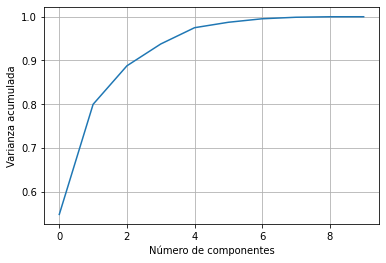

In [ ]:
# Se grafica la varianza acumulada en las nuevas dimensiones
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 6:** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [ ]:
print(pd.DataFrame(abs(pca.components_)))

          0         1         2         3         4         5         6  \
0  0.363938  0.154451  0.376044  0.364086  0.232481  0.364442  0.395748   
1  0.313929  0.147181  0.284658  0.304842  0.401962  0.266013  0.104286   
2  0.124428  0.951057  0.114084  0.123378  0.166532  0.058278  0.041146   
3  0.029559  0.008916  0.013458  0.013443  0.107802  0.185700  0.166654   
4  0.031067  0.219923  0.005945  0.019341  0.843745  0.240183  0.312533   
5  0.264180  0.032207  0.237819  0.331707  0.062225  0.005271  0.601467   
6  0.044188  0.020557  0.083369  0.261188  0.011292  0.803805  0.367136   
7  0.084834  0.007127  0.089259  0.144610  0.170503  0.063980  0.449573   
8  0.474425  0.004213  0.380167  0.747347  0.005847  0.218732  0.081171   
9  0.669071  0.000250  0.740491  0.032359  0.003690  0.052753  0.010367   

          7         8         9  
0  0.418038  0.215238  0.071837  
1  0.007184  0.368301  0.571768  
2  0.068554  0.036724  0.113584  
3  0.072984  0.892998  0.349332  
4  0

In [ ]:
CargasComponentes = pd.DataFrame(pca.components_, columns=NuevaMatriz.columns)
CargasComponentes

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,0.363938,0.154451,0.376044,0.364086,0.232481,0.364442,0.395748,0.418038,0.215238,0.071837
1,-0.313929,-0.147181,-0.284658,-0.304842,0.401962,0.266013,0.104286,0.007184,0.368301,0.571768
2,-0.124428,0.951057,-0.114084,-0.123378,-0.166532,0.058278,0.041146,-0.068554,0.036724,0.113584
3,0.029559,0.008916,0.013458,0.013443,-0.107802,-0.185700,-0.166654,-0.072984,0.892998,-0.349332
4,-0.031067,-0.219923,-0.005945,-0.019341,-0.843745,0.240183,0.312533,-0.009180,0.112888,0.264878
5,-0.264180,-0.032207,-0.237819,-0.331707,0.062225,0.005271,0.601467,0.265613,-0.061957,-0.567919
6,-0.044188,0.020557,-0.083369,0.261188,0.011292,-0.803805,0.367136,0.141313,0.047902,0.345214
7,0.084834,-0.007127,0.089259,0.144610,0.170503,0.063980,0.449573,-0.850919,0.016456,-0.065259
8,-0.474425,-0.004213,-0.380167,0.747347,-0.005847,0.218732,-0.081171,0.022025,-0.009068,-0.129667
9,-0.669071,0.000250,0.740491,-0.032359,0.003690,-0.052753,-0.010367,-0.003748,0.001467,0.007057


In [ ]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=NuevaMatriz.columns)
CargasComponentes

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
0,0.363938,0.154451,0.376044,0.364086,0.232481,0.364442,0.395748,0.418038,0.215238,0.071837
1,0.313929,0.147181,0.284658,0.304842,0.401962,0.266013,0.104286,0.007184,0.368301,0.571768
2,0.124428,0.951057,0.114084,0.123378,0.166532,0.058278,0.041146,0.068554,0.036724,0.113584
3,0.029559,0.008916,0.013458,0.013443,0.107802,0.185700,0.166654,0.072984,0.892998,0.349332
4,0.031067,0.219923,0.005945,0.019341,0.843745,0.240183,0.312533,0.009180,0.112888,0.264878
5,0.264180,0.032207,0.237819,0.331707,0.062225,0.005271,0.601467,0.265613,0.061957,0.567919
6,0.044188,0.020557,0.083369,0.261188,0.011292,0.803805,0.367136,0.141313,0.047902,0.345214
7,0.084834,0.007127,0.089259,0.144610,0.170503,0.063980,0.449573,0.850919,0.016456,0.065259
8,0.474425,0.004213,0.380167,0.747347,0.005847,0.218732,0.081171,0.022025,0.009068,0.129667
9,0.669071,0.000250,0.740491,0.032359,0.003690,0.052753,0.010367,0.003748,0.001467,0.007057


In [ ]:
DatosCancerACP = BCancer.drop(columns=['IDNumber', 'Radius', 'Area', 'Compactness', 'Symmetry'])
DatosCancerACP

,Diagnosis,Texture,Perimeter,Smoothness,Concavity,ConcavePoints,FractalDimension
0,M,10.38,122.80,0.11840,0.30010,0.14710,0.07871
1,M,17.77,132.90,0.08474,0.08690,0.07017,0.05667
2,M,21.25,130.00,0.10960,0.19740,0.12790,0.05999
3,M,20.38,77.58,0.14250,0.24140,0.10520,0.09744
4,M,14.34,135.10,0.10030,0.19800,0.10430,0.05883
...,...,...,...,...,...,...,...
564,M,22.39,142.00,0.11100,0.24390,0.13890,0.05623
565,M,28.25,131.20,0.09780,0.14400,0.09791,0.05533
566,M,28.08,108.30,0.08455,0.09251,0.05302,0.05648
567,M,29.33,140.10,0.11780,0.35140,0.15200,0.07016


## **II. Análisis correlacional de datos (ACD)**

 **Evaluación visual**

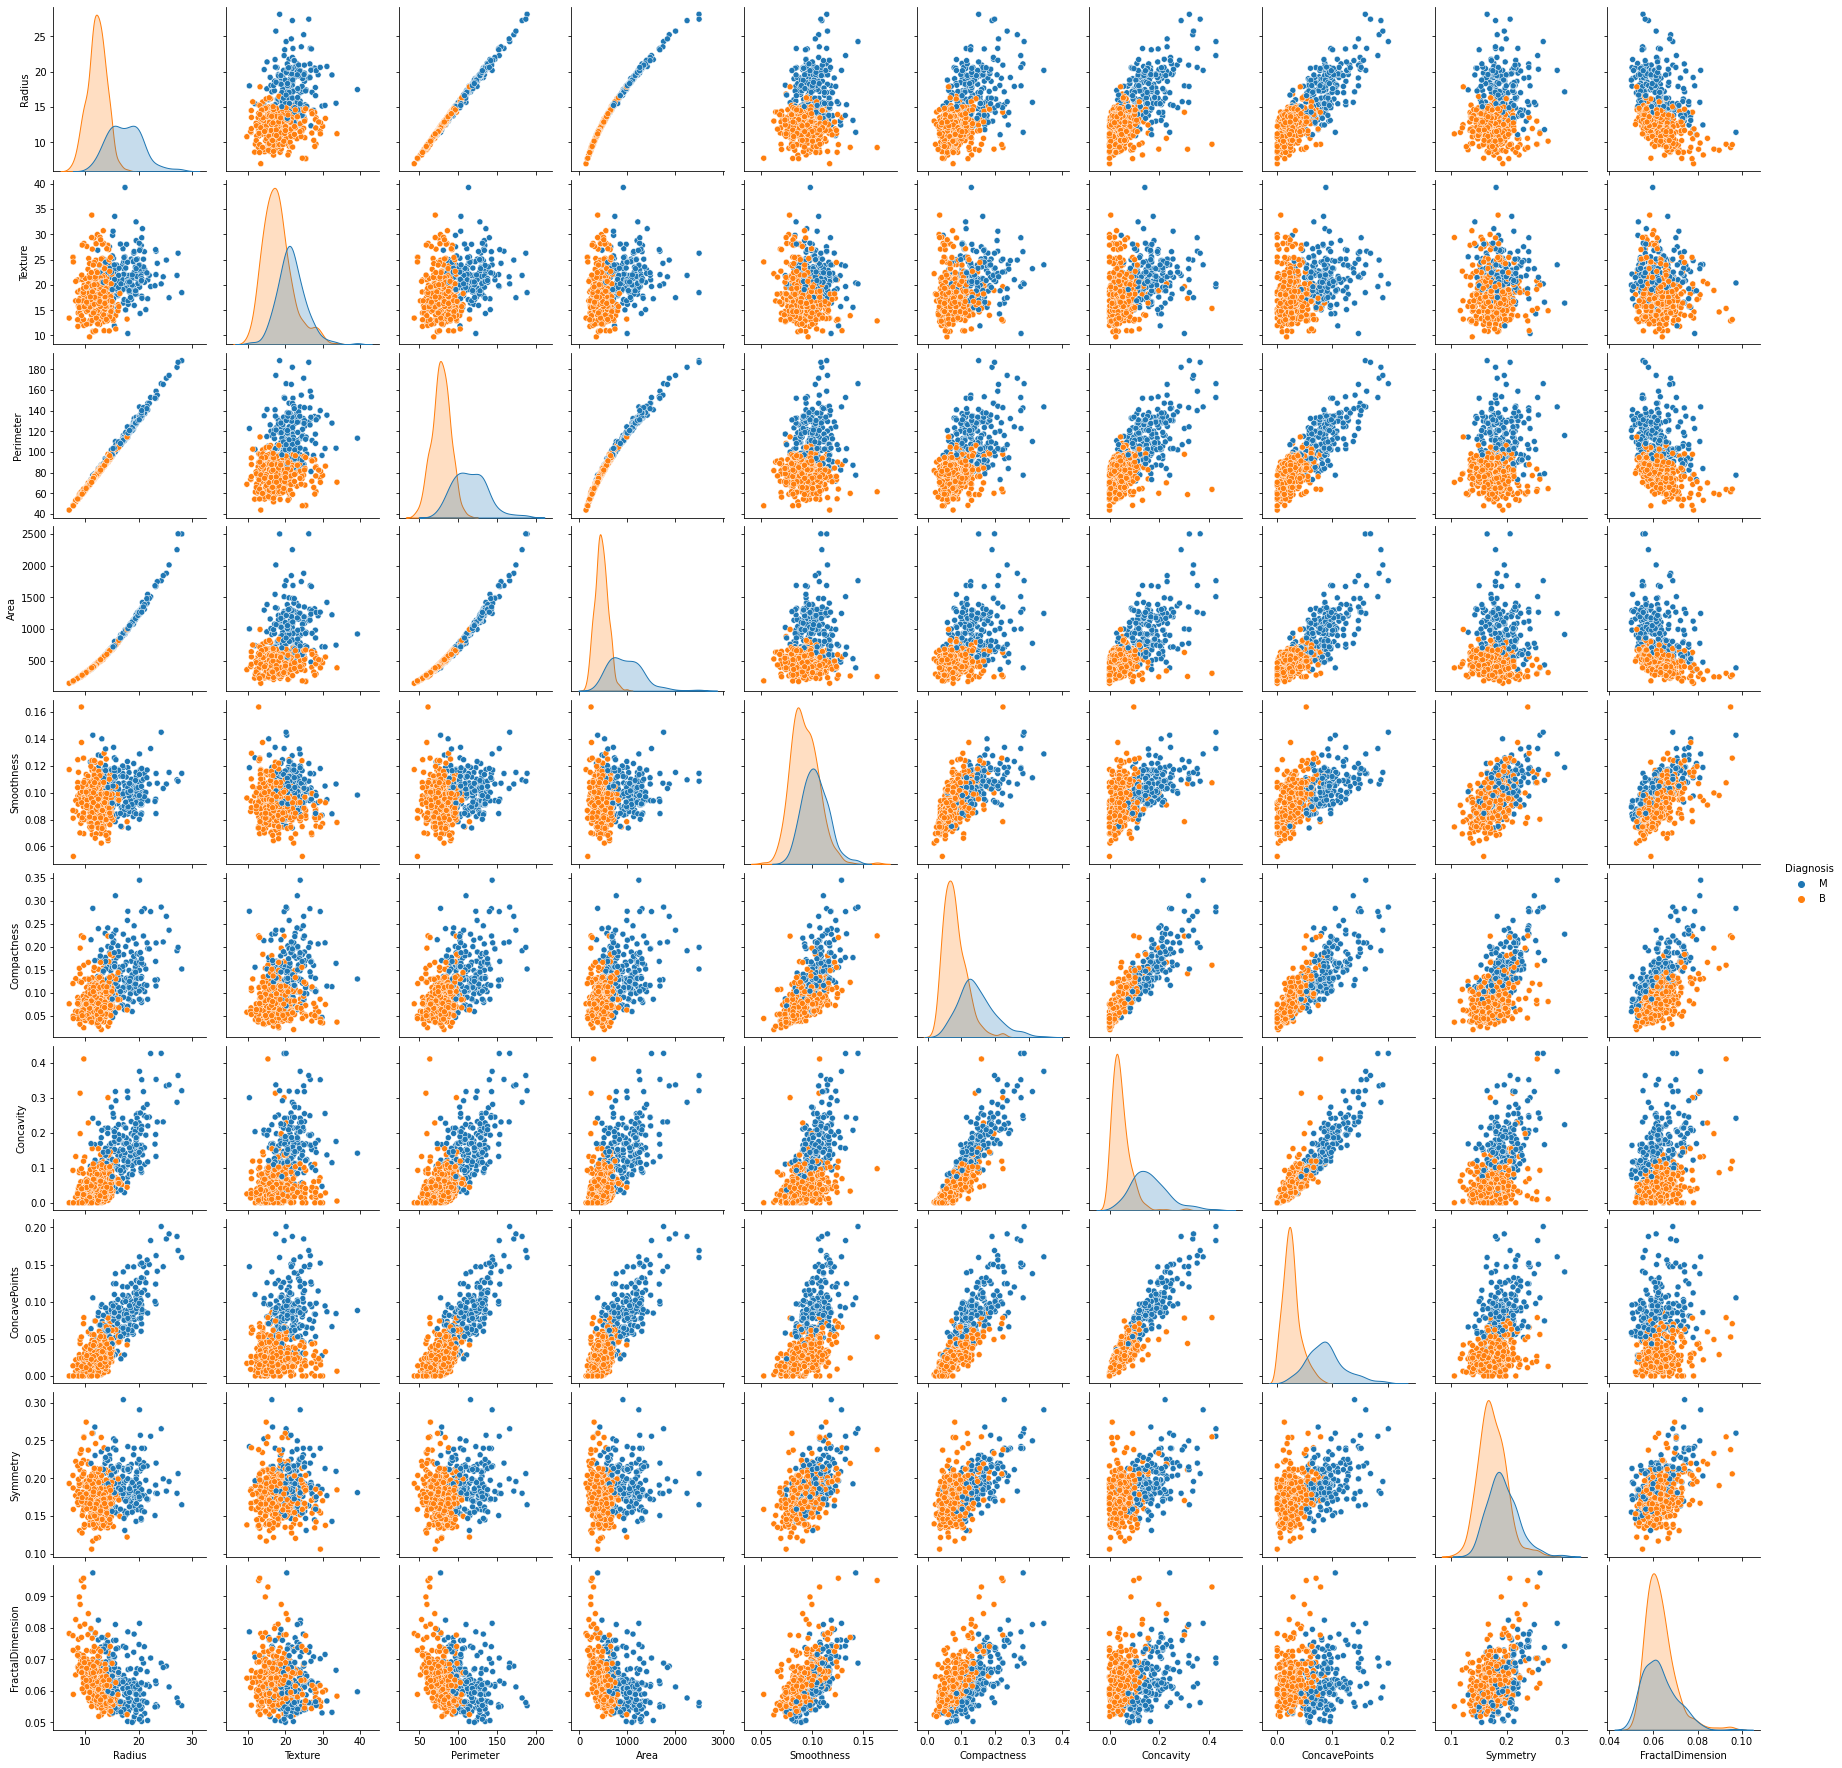

In [ ]:
sns.pairplot(BCancer, hue='Diagnosis')
plt.show()

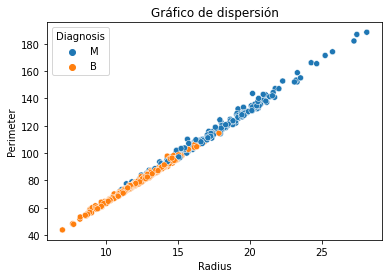

In [ ]:
sns.scatterplot(x='Radius', y ='Perimeter', data=BCancer, hue='Diagnosis')
plt.title('Gráfico de dispersión')
plt.xlabel('Radius')
plt.ylabel('Perimeter')
plt.show()

In [ ]:
CorrBCancer = BCancer.corr(method='pearson')
CorrBCancer

,Radius,Texture,Perimeter,Area,Smoothness,Compactness,Concavity,ConcavePoints,Symmetry,FractalDimension
Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
ConcavePoints,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
FractalDimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [ ]:
print(CorrBCancer['Radius'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores 

Radius              1.000000
Perimeter           0.997855
Area                0.987357
ConcavePoints       0.822529
Concavity           0.676764
Compactness         0.506124
Texture             0.323782
Smoothness          0.170581
Symmetry            0.147741
FractalDimension   -0.311631
Name: Radius, dtype: float64 



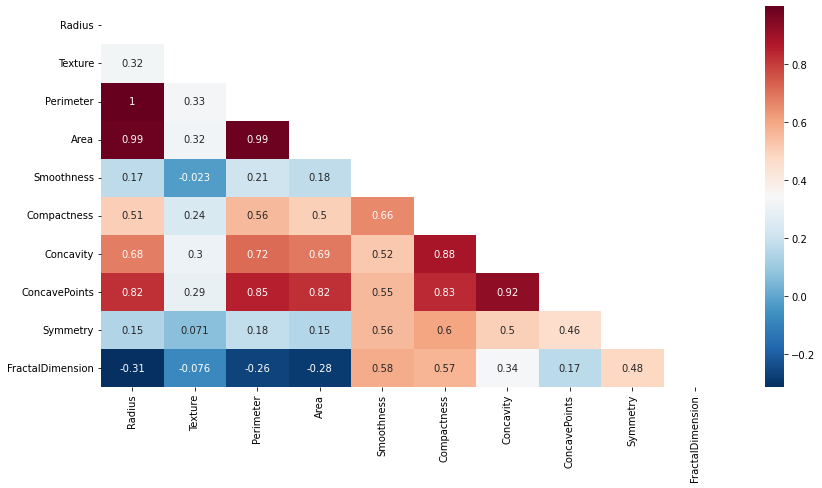

In [ ]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrBCancer)
sns.heatmap(CorrBCancer, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

1) FractalDimension

2) Symmetry

3) Textura

4) Smoothness

5) Area

6) Compactness

In [ ]:
DatosCancerACD = BCancer.drop(columns=['IDNumber', 'Radius', 'Perimeter', 'ConcavePoints', 'Concavity'])
DatosCancerACD 

,Diagnosis,Texture,Area,Smoothness,Compactness,Symmetry,FractalDimension
0,M,10.38,1001.0,0.11840,0.27760,0.2419,0.07871
1,M,17.77,1326.0,0.08474,0.07864,0.1812,0.05667
2,M,21.25,1203.0,0.10960,0.15990,0.2069,0.05999
3,M,20.38,386.1,0.14250,0.28390,0.2597,0.09744
4,M,14.34,1297.0,0.10030,0.13280,0.1809,0.05883
...,...,...,...,...,...,...,...
564,M,22.39,1479.0,0.11100,0.11590,0.1726,0.05623
565,M,28.25,1261.0,0.09780,0.10340,0.1752,0.05533
566,M,28.08,858.1,0.08455,0.10230,0.1590,0.05648
567,M,29.33,1265.0,0.11780,0.27700,0.2397,0.07016
